# 1. Clasificación de carpetas por patología

# 2 Preparación CARPETAS

In [6]:
import os

# Lista de carpetas donde están las imágenes
folders = ["NV1", "MEL1","VAS1", "XDF1"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")

📂 NV1: 516 imágenes
📂 MEL1: 252 imágenes
📂 VAS1: 252 imágenes
📂 XDF1: 252 imágenes


In [7]:
#Crear carpetas para hacer el set de datos

import os

# Definir las carpetas a crear
base_folder = "datasetPruebaMEL_NV"
categories = ["NV", "MEL","VAS","XDF"]

# Crear la carpeta principal si no existe
if not os.path.exists(base_folder):
    os.makedirs(base_folder)
    print(f"📂 Carpeta creada: {base_folder}")
else:
    print(f"⚠️ La carpeta {base_folder} ya existe")

# Crear las subcarpetas para cada categoría
for category in categories:
    category_path = os.path.join(base_folder, category)
    if not os.path.exists(category_path):
        os.makedirs(category_path)
        print(f"📂 Subcarpeta creada: {category_path}")
    else:
        print(f"⚠️ La subcarpeta {category_path} ya existe")

📂 Carpeta creada: datasetPruebaMEL_NV
📂 Subcarpeta creada: datasetPruebaMEL_NV\NV
📂 Subcarpeta creada: datasetPruebaMEL_NV\MEL
📂 Subcarpeta creada: datasetPruebaMEL_NV\VAS
📂 Subcarpeta creada: datasetPruebaMEL_NV\XDF


In [8]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'NV1'
carpeta_destino = 'datasetPruebaMEL_NV/NV'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 252:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [9]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'MEL1'
carpeta_destino = 'datasetPruebaMEL_NV/MEL'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 252:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [10]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'VAS1'
carpeta_destino = 'datasetPruebaMEL_NV/VAS'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 252:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [11]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'XDF1'
carpeta_destino = 'datasetPruebaMEL_NV/XDF'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 252:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [12]:
# Lista de carpetas donde están las imágenes
folders = ["datasetPruebaMEL_NV/NV", "datasetPruebaMEL_NV/MEL", "datasetPruebaMEL_NV/VAS", "datasetPruebaMEL_NV/XDF"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")

📂 datasetPruebaMEL_NV/NV: 252 imágenes
📂 datasetPruebaMEL_NV/MEL: 252 imágenes
📂 datasetPruebaMEL_NV/VAS: 252 imágenes
📂 datasetPruebaMEL_NV/XDF: 252 imágenes


Found 808 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


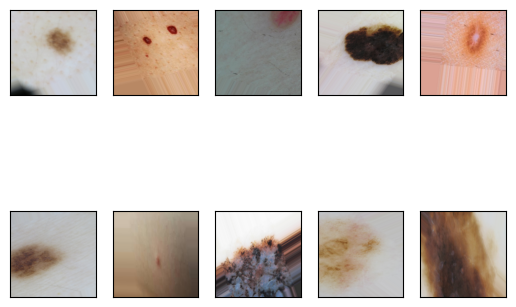

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('datasetPruebaMEL_NV', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('datasetPruebaMEL_NV', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [14]:
# Importaciones necesarias para usar Keras con TensorFlow 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Aquí van el resto de las importaciones necesarias para tu proyecto
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Cargar MobileNetV2 como modelo base (sin usar TensorFlow Hub)
mobilenetv2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [21]:
# Congelar las primeras capas del modelo base
mobilenetv2_base.trainable = False

In [22]:
# Crear un modelo de la red con MobileNetV2 como base
modelo = Sequential([
    mobilenetv2_base,
    GlobalAveragePooling2D(),
    Dense(4, activation='softmax')  # Nueva capa de salida
])


In [23]:
# Resumen del modelo
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [24]:
# Compilar el modelo utilizando la API de optimizadores de TensorFlow 2.x
modelo.compile(
    optimizer=Adam(learning_rate=0.0001),  # Ajuste de la tasa de aprendizaje para fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear generadores de datos para entrenamiento y validación
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% de las imágenes serán de validación
)

# Directorio con las imágenes
ruta_datos = "datasetPruebaMEL_NV"

# Generador para entrenamiento
data_gen_entrenamiento = datagen.flow_from_directory(
    ruta_datos,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generador para validación
data_gen_pruebas = datagen.flow_from_directory(
    ruta_datos,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 808 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [70]:
# Fine-Tuning: Desbloquear las últimas capas de MobileNetV2
for layer in mobilenetv2_base.layers[-10:]:  # Ajustar el número de capas según el modelo
    layer.trainable = True

# Volver a compilar el modelo después de habilitar el fine-tuning
modelo.compile(
    optimizer=Adam(learning_rate=0.00007),  # Ajustar la tasa de aprendizaje para fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
EPOCAS = 75
historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS,
    validation_data=data_gen_pruebas
)


Epoch 1/75
26/26 [==============================] - 29s 1s/step - loss: 0.2514 - accuracy: 0.9158 - val_loss: 0.4971 - val_accuracy: 0.8050
Epoch 2/75
26/26 [==============================] - 32s 1s/step - loss: 0.2330 - accuracy: 0.9356 - val_loss: 0.5040 - val_accuracy: 0.8100
Epoch 3/75
26/26 [==============================] - 37s 1s/step - loss: 0.2298 - accuracy: 0.9394 - val_loss: 0.5167 - val_accuracy: 0.8100
Epoch 4/75
26/26 [==============================] - 36s 1s/step - loss: 0.2577 - accuracy: 0.9270 - val_loss: 0.5245 - val_accuracy: 0.7900
Epoch 5/75
26/26 [==============================] - 31s 1s/step - loss: 0.2484 - accuracy: 0.9270 - val_loss: 0.5208 - val_accuracy: 0.8000
Epoch 6/75
26/26 [==============================] - 29s 1s/step - loss: 0.2448 - accuracy: 0.9196 - val_loss: 0.5591 - val_accuracy: 0.7850
Epoch 7/75
26/26 [==============================] - 33s 1s/step - loss: 0.2459 - accuracy: 0.9220 - val_loss: 0.5125 - val_accuracy: 0.7950
Epoch 8/75
26/26 [==

acc = [0.9158415794372559, 0.9356435537338257, 0.9393564462661743, 0.926980197429657, 0.926980197429657, 0.9195544719696045, 0.9220296740531921, 0.9319307208061218, 0.9207921028137207, 0.9220296740531921, 0.9319307208061218, 0.9368811845779419, 0.9306930899620056, 0.9331682920455933, 0.9368811845779419, 0.9294554591178894, 0.9368811845779419, 0.9381188154220581, 0.9245049357414246, 0.9393564462661743, 0.9467821717262268, 0.9294554591178894, 0.9319307208061218, 0.9232673048973083, 0.9331682920455933, 0.9294554591178894, 0.9158415794372559, 0.9232673048973083, 0.9492574334144592, 0.9294554591178894, 0.926980197429657, 0.9344059228897095, 0.9356435537338257, 0.9504950642585754, 0.9418317079544067, 0.9381188154220581, 0.926980197429657, 0.9319307208061218, 0.9319307208061218, 0.9393564462661743, 0.9344059228897095, 0.9232673048973083, 0.9430692791938782, 0.9368811845779419, 0.9319307208061218, 0.9381188154220581, 0.9331682920455933, 0.9356435537338257, 0.9344059228897095, 0.940594077110290

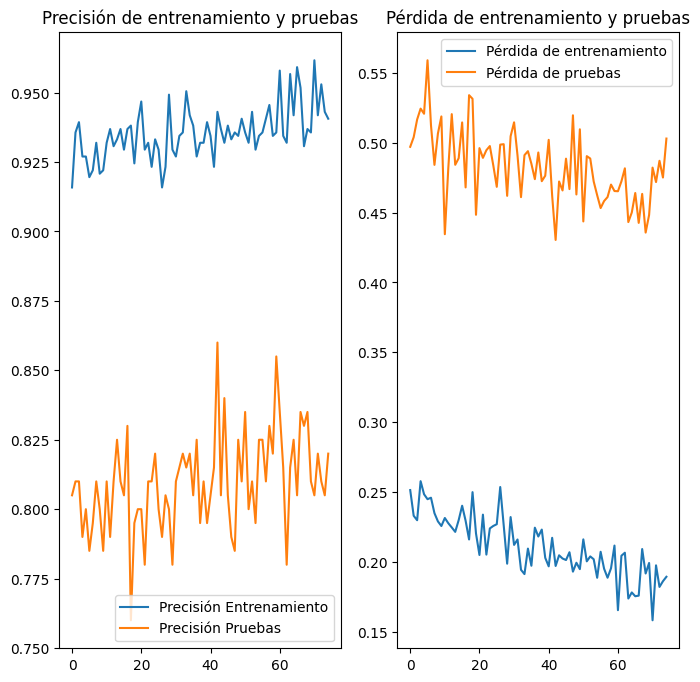

In [72]:
import os
import matplotlib.pyplot as plt
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(75)

print('acc = ' + str(acc) + ', val_acc = ' + str(val_acc) + ', loss = ' + str(loss) + ', val_loss = ' + str(val_loss))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [73]:
import requests
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from io import BytesIO

# Lista de clases, en el orden en que el modelo las espera
clases = ['MEL', 'NV', 'VAS', 'XDF']

def categorizar(url):
    # Solicitar la imagen desde la URL
    respuesta = requests.get(url)
    img_array = np.array(bytearray(respuesta.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    
    # Procesar la imagen
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB si es necesario
    img = cv2.resize(img, (224, 224))  # Redimensionar la imagen para que se ajuste al tamaño de entrada del modelo
    img = img.astype(float) / 255.0  # Normalizar los valores de los píxeles entre 0 y 1
    
    # Realizar la predicción
    prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
    
    # Obtener el índice de la clase con la mayor probabilidad
    indice_prediccion = np.argmax(prediccion[0], axis=-1)
    
    # Devolver la clase correspondiente (en lugar del índice)
    return clases[indice_prediccion]


In [121]:
import numpy as np
#0 = MEL, 1 = NV, 2 = VAS, 3 = XDF
url = 'https://www.clinicadermatologicainternacional.com/wp-content/uploads/2021/01/Imagen-2021-1a.jpg' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 49ms/step
MEL
